# Observing QSO's from Lick Observatory

In [39]:
#Import necessary packages and functions that I'll use throughout the script. 
import pandas as pd
import astroplan
import numpy as np
import matplotlib.pyplot as plt
from astroplan import FixedTarget, Observer, time_grid_from_range, moon_illumination, AtNightConstraint,observability_table, MoonSeparationConstraint, moon_phase_angle,AirmassConstraint

from astroplan.plots import plot_sky, plot_airmass
from astropy.time import Time, TimeDelta
from astropy.coordinates import SkyCoord
import astropy.units as U
import pytz

In [33]:
#Import data and attach to data structure (Pandas dataframe). 
data = pd.read_csv('QSO_data.csv', names=['specobjid', 'ra', 'dec', 'plate', 'mjd', 'fiberid'], header=1)

my_timezone = pytz.timezone('US/Pacific')#Set timezone at Lick observatory. I just googled this.
Lick = Observer.at_site('Lick observatory') #Set observation site 
Lick.timezone = my_timezone #Set Lick observatory timezone
time_start_str = "2019-04-01" #Set starting date of observations
time_stop_str = "2019-04-15"# Set ending date of observations
obs_start = Time(time_start_str) #Transform both into astropy Time objects
obs_stop = Time(time_stop_str)

In [34]:
#Mask data according to co-ordinate bounds. This cuts down the data to about 20-25 objects
mask = (data['ra']>8)&(data['ra']<16)&(data['dec']<45)&(data['dec']>-45)
masked_data = data[mask]
masked_data.index = range(len(masked_data)) #reindex dataframe

In [35]:
#Use list comprehension to generate astropy.coordinate.SKyCoord objects
Sky_coord_objects = [SkyCoord(ra=masked_data['ra'][i]*U.hourangle, dec=masked_data['dec'][i]*U.deg) for i in masked_data.index]

#Similarily, create list of astroplan.FixedTarget objects
targets = [FixedTarget(Sky_coord_objects[i], name=masked_data['specobjid'][i]) for i in masked_data.index]

# Create list of timestamps for the midnights of each night in the observing window.
##### NOTE: These timestamps are relative to UTC, NOT PST
midnights = [Lick.midnight(obs_start+TimeDelta(i*60*60*24, format='sec'), which='next').iso for i in range(15)]

#Create 2-d array of the local co-ordinates of our objects at each midnight. 
#I dont currently use this list in the following code, but dont want to delete it incase I find use for it later on. 
altazs = [[Lick.altaz(midnight, target) for midnight in midnights] for target in targets]

As can be seen in the 'always observable' column, no QSO will always be visible.


target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
7.92659e+18            True             False          0.5882352941176471
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
6.41992e+18            True             False          0.8235294117647058
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
4.04215e+18            True             False          0.7058823529411765
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
4.04223e+18            True             False          0.7647058823529411
target name ever observable a

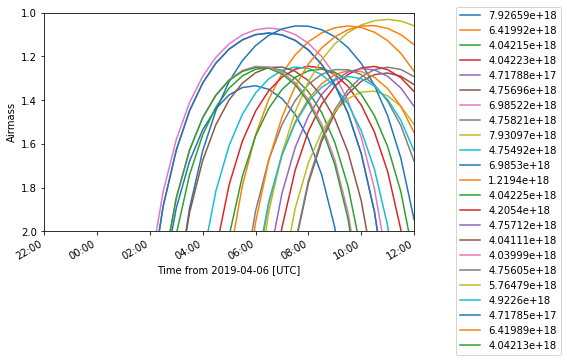

In [41]:
#Set observing range and generate a time grid
window_range = [obs_start, obs_stop]
window_time_grid = time_grid_from_range(window_range)

#Set start and end of observing
observe_start = Lick.twilight_evening_astronomical(obs_start, which='nearest')
observe_end=Lick.twilight_morning_astronomical(obs_stop, which='next')
observe_range = [observe_start, observe_end]
moon_illumination(observe_start)

#Set some constraints on our data such as making sure its actually dark out and the moon is sufficiently far away from 
#our targets
constraints = [AtNightConstraint.twilight_astronomical()]
constraints.append(MoonSeparationConstraint(50*U.deg))
constraints.append(AirmassConstraint(2.0))

#From the above information, generate an observing_table. This tells us if we can actually ever observe each QSO
# given the above constraints. 
##################NOTE: The object ID's some how got messed up and I couldnt figure out how to fix it.
observing_table = observability_table(constraints, Lick, targets, time_range = observe_range)
print("As can be seen in the 'always observable' column, no QSO will always be visible.\n\n")
for row in observing_table:
        print(row)

#Plot the air mass for each target on each night. This plot will come in handy later.
for inx, obj in enumerate(targets):
        if observing_table['ever observable'][inx]:
            plot_airmass(obj, Lick, window_time_grid, max_airmass=2.0)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [37]:
print("The phase of the moon (in fractions of pi) during each night of observing during our given observing window is: \n NOTE: 1='new', 0='full'")
for midnight in midnights:
    print("At midnight on {0}, the moon is at the phase {1:0.4f}".format(Time(midnight).datetime.date(),(moon_phase_angle(Time(midnight)).to(U.rad)/(np.pi)).value))
print("From the above, we see that the best nights to observe (during the new moon) are april 4th through april 7th.")

The phase of the moon (in fractions of pi) during each night of observing during our given observing window is: 
 NOTE: 1='new', 0='full'
At midnight on 2019-04-01, the moon is at the phase 0.7513
At midnight on 2019-04-02, the moon is at the phase 0.8112
At midnight on 2019-04-03, the moon is at the phase 0.8712
At midnight on 2019-04-04, the moon is at the phase 0.9302
At midnight on 2019-04-05, the moon is at the phase 0.9723
At midnight on 2019-04-06, the moon is at the phase 0.9320
At midnight on 2019-04-07, the moon is at the phase 0.8703
At midnight on 2019-04-08, the moon is at the phase 0.8055
At midnight on 2019-04-09, the moon is at the phase 0.7392
At midnight on 2019-04-10, the moon is at the phase 0.6714
At midnight on 2019-04-11, the moon is at the phase 0.6023
At midnight on 2019-04-12, the moon is at the phase 0.5319
At midnight on 2019-04-13, the moon is at the phase 0.4601
At midnight on 2019-04-14, the moon is at the phase 0.3870
At midnight on 2019-04-15, the moon 

## Best night to observe

As can be seen in the 'ever observable' column, during this night, we can observe each QSO, according to the constraints we placed on the observing window


target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
7.92659e+18            True             False          0.3076923076923077
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
6.41992e+18            True             False          0.4307692307692308
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
4.04215e+18            True             False         0.35384615384615387
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
4.04223e+18            True  

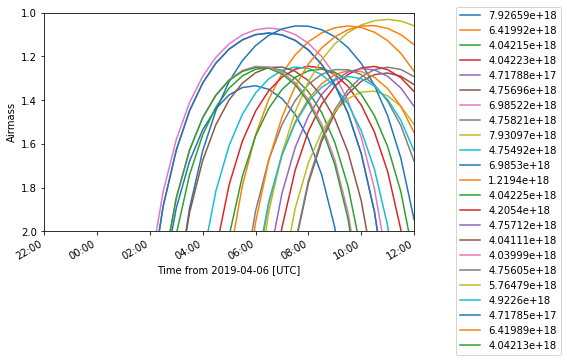

In [42]:
#Set observing range and generate a time grid for new observing night
##Redefine variables for optimal observing night.###### Note abuse of namespace

#After discussion with my group partners, we decide these two dates were best for observing, as we will see below.
#These dates were chosen as to minimize interference from moon illumination, which we found from the above cell. 
#During these dates, the moon is in the 'new' phase
obs_start = Time("2019-4-6 22:00:00") #Transform both into astropy Time objects
obs_stop = Time("2019-4-7 12:00:00")
window_range = [obs_start, obs_stop]
window_time_grid = time_grid_from_range(window_range)

#Set start and end of observing
observe_start = Lick.twilight_evening_astronomical(obs_start, which='previous')
observe_end=Lick.twilight_morning_astronomical(obs_stop, which='next')
observe_range = [observe_start, observe_end]
moon_illumination(observe_start)

#Set some constraints on our data such as making sure its actually dark out and the moon is sufficiently far away from 
#our targets
constraints = [AtNightConstraint.twilight_astronomical()]
constraints.append(MoonSeparationConstraint(50*U.deg))
constraints.append(AirmassConstraint(2.0))


#From the above information, generate an observing_table. This tells us if we can actually ever observe each QSO
# given the above constraints. 
##################NOTE: The object ID's some how got messed up and I couldnt figure out how to fix it.
observing_table = observability_table(constraints, Lick, targets, time_range = observe_range)
print("As can be seen in the 'ever observable' column, during this night, we can observe each QSO, according to the constraints we placed on the observing window\n\n")
for row in observing_table:
        print(row)

#Plot the air mass for each target on this chosen night
for inx, obj in enumerate(targets):
        if observing_table['ever observable'][inx]:
            plot_airmass(obj, Lick, window_time_grid, max_airmass=2.0)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

# Month later observations

In [48]:
#Redefine our observing range to be a month later
time_start_str = "2019-05-01"
time_stop_str = "2019-05-15"
obs_start = Time(time_start_str)
obs_stop = Time(time_stop_str)

In [49]:
#remask our data
mask = (data['ra']>8)&(data['ra']<16)&(data['dec']<45)&(data['dec']>-45)
masked_data = data[mask]
masked_data.index = range(len(masked_data))

In [50]:
#Recalculate the necessary python objects
Sky_coord_objects = [SkyCoord(ra=masked_data['ra'][i]*U.hourangle, dec=masked_data['dec'][i]*U.deg) for i in masked_data.index]
targets = [FixedTarget(Sky_coord_objects[i], name=masked_data['specobjid'][i]) for i in masked_data.index]
midnights = [Lick.midnight(obs_start+TimeDelta(i*60*60*24, format='sec'), which='next').iso for i in range(15)]
altazs = [[Lick.altaz(midnight, target) for midnight in midnights] for target in targets]

As can be seen in the 'always observable' column, no QSO will always be visible.


target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
7.92659e+18            True             False         0.06997084548104957
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
6.41992e+18            True             False         0.24927113702623907
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
4.04215e+18            True             False         0.09475218658892129
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
4.04223e+18            True             False         0.15451895043731778
target name ever observable a

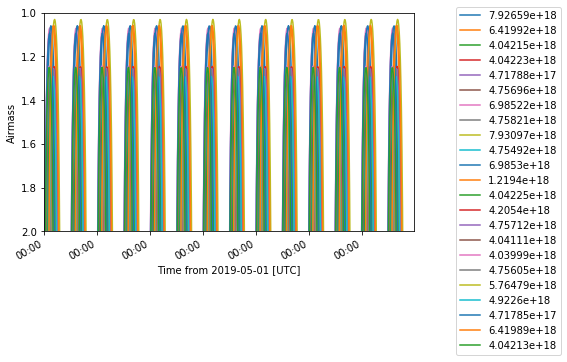

In [51]:
#Set new observing range and generate a new time grid
window_range = [obs_start, obs_stop]
window_time_grid = time_grid_from_range(window_range)

#Set start and end of month-later observing
observe_start = Lick.twilight_evening_astronomical(obs_start, which='nearest')
observe_end=Lick.twilight_morning_astronomical(obs_stop, which='next')
observe_range = [observe_start, observe_end]
moon_illumination(observe_start)

#Set some constraints on our data such as making sure its actually dark out and the moon is sufficiently far away from 
#our targets
constraints = [AtNightConstraint.twilight_astronomical()]
constraints.append(MoonSeparationConstraint(50*U.deg))
constraints.append(AirmassConstraint(2.0))

#From the above information, generate an observing_table. This tells us if we can actually ever observe each QSO
# given the above constraints. 
##################NOTE: The object ID's some how got messed up and I couldnt figure out how to fix it.
observing_table = observability_table(constraints, Lick, targets, time_range = observe_range)
print("As can be seen in the 'always observable' column, no QSO will always be visible.\n\n")
for row in observing_table:
        print(row)

#Plot the air mass for each target on each night. This plot will come in handy later.
for inx, obj in enumerate(targets):
        if observing_table['ever observable'][inx]:
            plot_airmass(obj, Lick, window_time_grid, max_airmass=2.0)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [52]:
print("The phase of the moon (in fractions of pi) during each night of observing during our new month-later observing window is: \n NOTE: 1='new', 0='full'")
for midnight in midnights:
    print("At midnight on {0}, the moon is at the phase {1:0.4f}".format(Time(midnight).datetime.date(),(moon_phase_angle(Time(midnight)).to(U.rad)/(np.pi)).value))
print("\n\nFrom the above, we see that the best nights to observe (during the new moon) are may 3th through may 6th.")

The phase of the moon (in fractions of pi) during each night of observing during our new month-later observing window is: 
 NOTE: 1='new', 0='full'
At midnight on 2019-05-01, the moon is at the phase 0.7657
At midnight on 2019-05-02, the moon is at the phase 0.8276
At midnight on 2019-05-03, the moon is at the phase 0.8902
At midnight on 2019-05-04, the moon is at the phase 0.9511
At midnight on 2019-05-05, the moon is at the phase 0.9643
At midnight on 2019-05-06, the moon is at the phase 0.9037
At midnight on 2019-05-07, the moon is at the phase 0.8360
At midnight on 2019-05-08, the moon is at the phase 0.7664
At midnight on 2019-05-09, the moon is at the phase 0.6955
At midnight on 2019-05-10, the moon is at the phase 0.6238
At midnight on 2019-05-11, the moon is at the phase 0.5514
At midnight on 2019-05-12, the moon is at the phase 0.4784
At midnight on 2019-05-13, the moon is at the phase 0.4051
At midnight on 2019-05-14, the moon is at the phase 0.3316
At midnight on 2019-05-15,

As can be seen in the 'ever observable' column, during this new observing night, we can observe each QSO, according to the constraints we placed on the observing window 


target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
7.92659e+18            True             False         0.14545454545454545
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
6.41992e+18            True             False         0.36363636363636365
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
4.04215e+18            True             False         0.17272727272727273
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
4.04223e+18   

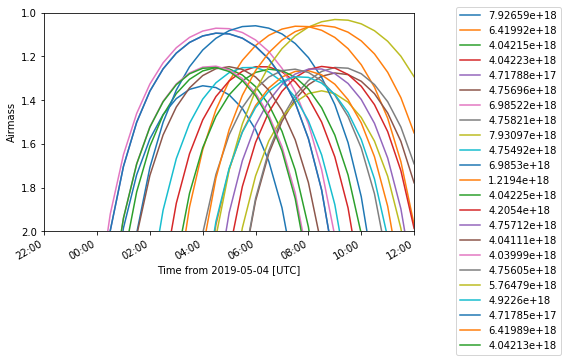

In [53]:
#Set observing range and generate a time grid for new observing night
##Redefine variables for optimal observing night.###### Note abuse of namespace

#After discussion with my group partners and calculating the phase of the moon above,
#we decide these two dates were best for observing, as we will see below.
#These dates were chosen as to minimize interference from moon illumination, which we found from the above cell. 
#During these dates, the moon is in the 'new' phase
obs_start = Time("2019-5-4 22:00:00") #Transform both into astropy Time objects
obs_stop = Time("2019-5-5 12:00:00")
window_range = [obs_start, obs_stop]
window_time_grid = time_grid_from_range(window_range)

#Set start and end of observing
observe_start = Lick.twilight_evening_astronomical(obs_start, which='previous')
observe_end=Lick.twilight_morning_astronomical(obs_stop, which='next')
observe_range = [observe_start, observe_end]
moon_illumination(observe_start)

#Set some constraints on our data such as making sure its actually dark out and the moon is sufficiently far away from 
#our targets
constraints = [AtNightConstraint.twilight_astronomical()]
constraints.append(MoonSeparationConstraint(50*U.deg))
constraints.append(AirmassConstraint(2.0))

#From the above information, generate an observing_table. This tells us if we can actually ever observe each QSO
# given the above constraints. 
##################NOTE: The object ID's some how got messed up and I couldnt figure out how to fix it.
observing_table = observability_table(constraints, Lick, targets, time_range = observe_range)
print("As can be seen in the 'ever observable' column, during this new observing night, we can observe each QSO, according to the constraints we placed on the observing window \n\n")
for row in observing_table:
        print(row)

#Plot the air mass for each target on this chosen night
for inx, obj in enumerate(targets):
        if observing_table['ever observable'][inx]:
            plot_airmass(obj, Lick, window_time_grid, max_airmass=2.0)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [54]:
print("As can see from the above air mass plot, we infact have a BETTER observing night. In this case, we got lucky that our original observing window got clouded out!")

As can see from the above air mass plot, we infact have a BETTER observing night. In this case, we got lucky that our original observing window got clouded out!
